<a href="https://colab.research.google.com/github/kralim/n0thing/blob/main/perfect_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR


In [5]:
veriler=pd.read_csv('train - train.csv')
testVerisi=pd.read_csv('test - test.csv')


for i in veriler.columns:
    if (veriler[i].isnull().sum()>10):
        veriler=veriler.drop([i],axis=1)
        testVerisi=testVerisi.drop([i],axis=1)
#print([i for i in veriler.columns if type(veriler[i][2])==str])
veriler=veriler.dropna(axis=0)
testVerisi=testVerisi.dropna(axis=0)

dms= pd.get_dummies( veriler[[i for i in veriler.columns if type(veriler[i][2])==str]] )
testVerisi = testVerisi.drop( veriler[ [i for i in veriler.columns if type(veriler[i][2])==str]] ,axis=1)

veriler = veriler.drop( veriler[ [i for i in veriler.columns if type(veriler[i][2])==str]] ,axis=1)
y=veriler[["SalePrice"]]
yWithId=veriler[["SalePrice","Id"]]

x=veriler.drop(["SalePrice"],axis=1)


yeniDf=pd.concat([x,dms],axis=1)

# Yeni Bölüm

In [6]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.001,random_state=1)
"""y_train= pd.DataFrame(data=y_train,index=range(len(y_train)))
y_test= pd.DataFrame(data=y_test,index=range(len(X_test)))
X_test= pd.DataFrame(data=X_test,index=range(len(X_test)))
X_train= pd.DataFrame(data=X_train,index=range(len(y_train)))"""
y_train = y_train.reset_index()
y_test = y_test.reset_index()
X_test = X_test.reset_index()
X_train = X_train.reset_index()
y_train=y_train.drop( y_train.columns[0],axis=1)#inedex column drop ediliyor
y_test=y_test.drop(y_test.columns[0],axis=1)
X_train=X_train.drop( X_train.columns[0],axis=1)
X_test=X_test.drop(X_test.columns[0],axis=1)

In [7]:
rf_model = RandomForestRegressor(random_state=1).fit(X_train,y_train)
y_pred = rf_model.predict(X_train)
print("train mse:",np.sqrt(mean_squared_error(y_train,y_pred)))
y_pred = rf_model.predict(X_test)
"test mse : ",np.sqrt( mean_squared_error(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


train mse: 10695.793603140046


('test mse : ', 12433.456645458653)

In [8]:
toplamVeri = pd.concat([x,testVerisi],axis=0)

id=int(input())
aid=toplamVeri.index[toplamVeri['Id'] == id].tolist()
print("predict price : ",rf_model.predict(toplamVeri.iloc[aid]))

1405
predict price :  [265802.04]


In [9]:
rf_params = {"max_depth": [5,8],
            "max_features": [2,5],
            "n_estimators":[200,500,1000],
            "min_samples_split":[2,10,80]}


In [10]:
rf_cv_model = GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [11]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 5,
 'min_samples_split': 2,
 'n_estimators': 500}

In [12]:
rf_model = RandomForestRegressor(random_state=42,
                                max_depth=8,
                                max_features=5,
                                min_samples_split=2,
                                n_estimators=500)
rf_tuned=rf_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [13]:
y_pred = rf_tuned.predict(X_train)
print("train mse:",np.sqrt(mean_squared_error(y_train,y_pred)))
y_pred = rf_tuned.predict(X_test)
"test mse : ",np.sqrt( mean_squared_error(y_test,y_pred))

train mse: 17586.688240919175


('test mse : ', 14932.922323957893)

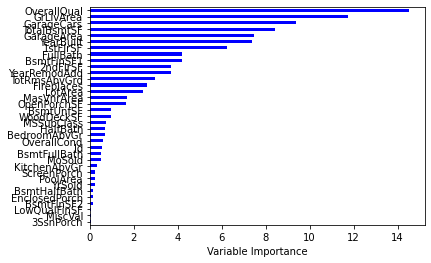

In [14]:
Importance = pd.DataFrame({'Importance':rf_tuned.feature_importances_*100},
                         index=X_train.columns)

Importance.sort_values(by='Importance',
                      axis=0,
                      ascending = True).plot(kind = 'barh',
                                           color = 'b',)

plt.xlabel('Variable Importance')
plt.gca().legend_=None